In [ ]:
import pandas as pd
import numpy as np




In [ ]:
# Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 present ?

csv_data = pd.read_csv("911.csv")

csv_top10 = csv_data.groupby('zip')['zip'].count().sort_values(ascending=False).head(10).reset_index(name='count')

print(csv_top10[csv_top10['zip'].isin([19446,19090])])


       zip  count
3  19446.0  12828
9  19090.0   6999


In [ ]:
#Compute -- What are the top 4 townships (twp) for 911 calls & Question 
# 2: Which of the following township are not present? -- 
# LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

csv_data = pd.read_csv("911.csv")

csv_top4 = csv_data.groupby('twp')['twp'].count().sort_values(ascending=False).head(4).reset_index(name='count')

print(csv_top4[~csv_top4['twp'].isin(['LOWER POTTSGROVE','NORRISTOWN', 'HORSHAM', 'ABINGTON'])])

            twp  count
0  LOWER MERION  22886
3  UPPER MERION  14015


In [ ]:
#Compute -- Create new features & 
#Question 3: What is the most common Reason for a 911 call based on Reason Column?
# Which comes second

csv_data = pd.read_csv("911.csv")

csv_top2 = csv_data.groupby('title')['title'].count().sort_values(ascending=False).head().reset_index(name='count')

df = csv_top2.iloc[2]

df


Traffic: VEHICLE ACCIDENT -        62218
Traffic: DISABLED VEHICLE -        18923
Fire: FIRE ALARM                   15091
EMS: RESPIRATORY EMERGENCY         13503
EMS: CARDIAC EMERGENCY             13420
                                   ...  
Fire: UNRESPONSIVE SUBJECT             1
Fire: UNCONSCIOUS SUBJECT              1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
Fire: PUBLIC SERVICE                   1
Name: title, Length: 130, dtype: int64

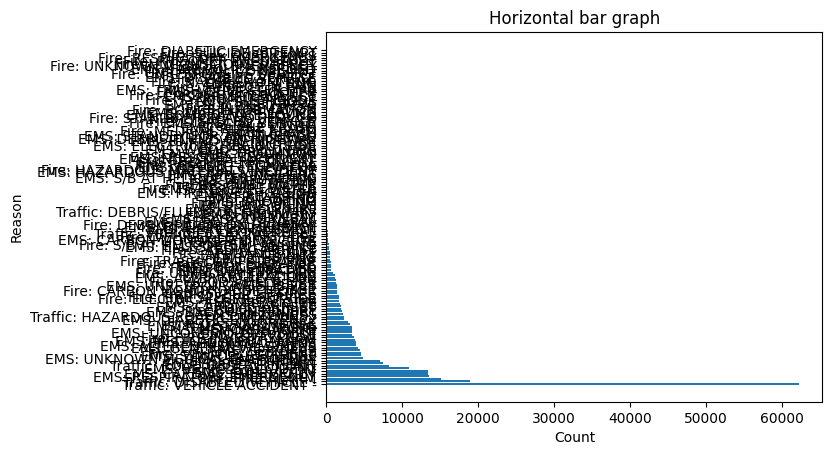

In [ ]:
#Compute -- Plot barchart using matplot for 911 calls by Reason & 
# Question 4: How can you plot the bars horizontally ?

import matplotlib.pyplot as plt
import numpy as np

csv_title = csv_data.groupby('title')['title'].count().sort_values(ascending=False).reset_index(name='count')
title = csv_title['title']
title_count = csv_title['count']

y=title.tolist()
 
# getting values against each value of y
x=title_count.tolist()
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("Reason")
 
# setting label of x-axis
plt.xlabel("Count")
plt.title("Horizontal bar graph")
plt.show()


In [12]:
#Do data manipulation & 
#Question 5: Which day got maximum calls for EMS and how many?

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("911.csv")

df['Date'] = pd.to_datetime(df['timeStamp']).dt.strftime('%m/%d/%Y')

print(df)

df_date = df.groupby('Date')['Date'].count().sort_values(ascending=False).reset_index(name='count')

print("Traffice Calls for EMS is high on :")
print(df_date.iloc[0])




              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
243622  40.081795 -75.299640   
243623  40.183822 -75.540830   
243624  39.986694 -75.256963   
243625  40.151412 -75.040718   
243626  40.143900        NaN   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
243622  FORREST ST & W 10TH AVE;  CONSHOHOCKEN; Statio...  19428.0   
243623  MAIN ST & S 3RD AVE; ROYERSFORD; 2017-09-04 @ .

In [7]:
#Compute -- Create a countplot of the Day of Week column with the hue based of the 
# Reason column & Question 6: On which day traffic calls were lowest ?

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("911.csv")
extract = lambda x: x.split(':')[0]

df = df.assign(Reason = df['title'].apply(extract))
df['Reason'].value_counts()


df['Date'] = pd.to_datetime(df['timeStamp']).dt.strftime('%m/%d/%Y')



df_date = df.groupby('Reason')['Date'].count().sort_values(ascending=False).reset_index(name='count')
print("Traffice Calls for EMS is low on :")
print(df_date.iloc[0])


Traffice Calls for EMS is low on :
Reason      EMS
count     16144
Name: 0, dtype: object


In [4]:
#Compute -- Create a countplot month wise -- 
# Question 7: Which month saw highest calls for fire?

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

df = pd.read_csv("911.csv")
extract = lambda x: x.split(':')[0]

df = df.assign(Reason = df['title'].apply(extract))
df['Reason'].value_counts()


type(df['timeStamp'].iloc[0])
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

time = df['timeStamp'].iloc[0]
time.hour

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df.head()

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])

df.head()



# sns.countplot(x = 'Day of Week', data = df, palette='viridis', hue = 'Reason')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


AttributeError: ignored

In [14]:
import numpy as np

df = pd.read_csv("911.csv")
print(df)

df['Date'] = pd.to_datetime(df['timeStamp']).dt.strftime('%m/%d/%Y')

df_date = df.groupby('Date')['Date'].count().sort_values(ascending=False).reset_index(name='count')

df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

time = df['timeStamp'].iloc[0]

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda x: dmap[x])

df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,12/10/2015,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,12/10/2015,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,12/10/2015,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,12/10/2015,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,12/10/2015,16,12,Thu
